In [7]:
# step37
# 37.2
import numpy as np
from dezero import Variable

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
print(t)
t.backward(retrain_grad=True)
print(x.grad)
print(c.grad)
# y = F.sum()
# y = np.sum(t.data)

variable([[11 22 33]
          [44 55 66]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


In [8]:
# step38
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.reshape(x, (6, ))
print(y)

[1 2 3 4 5 6]


In [1]:
# 38.2
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.reshape(x, (6,))
y.backward(retrain_grad=True)
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [13]:
# 38.2
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.random.randn(1,2,3))

y = x.reshape((2,3))
y = x.reshape(2,3)
y.backward()
print(x.grad)
print(x.grad.shape)

variable([[[1. 1. 1.]
           [1. 1. 1.]]])
(1, 2, 3)


In [5]:
# 38.3
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
print(x.shape)
y = F.transpose(x)
print(y.shape)
y = x.T
print(y.shape)
y.backward()
print(x.grad.shape)
print(x.grad)

(2, 3)
(3, 2)
(3, 2)
(2, 3)
variable([[1 1 1]
          [1 1 1]])


In [4]:
# 38.3
# multi transpose
import numpy as np
from dezero import Variable
import dezero.functions as F
x = Variable(np.random.randn(1,2,3,4))
print(x.shape)
t_axes = (3,0,1,2)
y = x.transpose(t_axes)
print(y.shape)
y.backward()
print(x.grad.shape)

(1, 2, 3, 4)
(4, 1, 2, 3)
(1, 2, 3, 4)


In [1]:
# step39
import numpy as np
from dezero import Variable
import dezero.functions as F
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x, axis=0)
y.backward()
print(y)
print(x.grad)

x = Variable(np.random.randn(2,3,4,5))
y = x.sum(keepdims=True)
print(y.shape)

NameError: name 'bloadcast_to' is not defined

In [1]:
# step40
import numpy as np
from dezero.utils import sum_to
x = np.array([[1,2,3], [4,5,6]])
y = sum_to(x, (1, 3))
print(y)

y = sum_to(x, (2, 1))
print(y)

[[5 7 9]]
[[ 6]
 [15]]


In [9]:
# 40.3
import numpy as np
from dezero import Variable

x0 = Variable(np.array([1,2,3]))
x1 = Variable(np.array([10]))

# add
y = x0 + x1
print(y)
y.backward()
print(x1.grad)

# sub
y = x0 - x1
print(y)
x0.cleargrad()
x1.cleargrad()
y.backward()
print(x1.grad)

# mul
y = x0 * x1
print(y)
x0.cleargrad()
x1.cleargrad()
y.backward()
print(x1.grad)
print(x0.grad)

# div
y = x0 / x1
print(y)
x0.cleargrad()
x1.cleargrad()
y.backward()
print(x1.grad)

variable([11 12 13])
variable([3])
variable([-9 -8 -7])
variable([-3])
variable([10 20 30])
variable([6])
variable([10 10 10])
variable([0.1 0.2 0.3])
variable([-0.06])


In [2]:
# step41
import numpy as np

# ベクトルの内積
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.dot(a, b)
print(c)

a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
c = np.dot(a, b)
print(c)

32
[[19 22]
 [43 50]]


In [10]:
x = np.array([[0,1,2,3]])
W = np.arange(0,20).reshape(4,5)
print(x.shape)
print(W.shape)

(1, 4)
(4, 5)


In [15]:
x

array([[0, 1, 2, 3]])

In [13]:
W

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [14]:
y

array([[70, 76, 82, 88, 94]])

In [12]:
y = np.dot(x, W)
y.shape

(1, 5)

In [8]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.arange(0,6).reshape(2,3))
W = Variable(np.arange(0,12).reshape(3,4))
y = F.matmul(x, W)
y.backward()
print(x)
print(W)
print(y)

print(x.grad.shape)
print(W.grad.shape)

variable([[0 1 2]
          [3 4 5]])
variable([[ 0  1  2  3]
          [ 4  5  6  7]
          [ 8  9 10 11]])
variable([[20 23 26 29]
          [56 68 80 92]])
(2, 3)
(3, 4)


In [24]:
gy  =np.ones(y.shape)
print(gy)
print(gy.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(2, 4)


In [25]:
gy.dot(W.T.data)

array([[ 6., 22., 38.],
       [ 6., 22., 38.]])

In [26]:
W.T.data

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [9]:
print(x.grad)

variable([[ 6 22 38]
          [ 6 22 38]])


(100, 1)


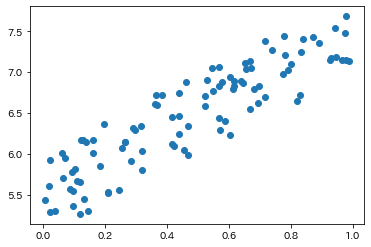

In [36]:
#step42
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

print(y.shape)

plt.scatter(x,y)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# トイ・データセット

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
# x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mse(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
#     loss = F.mean_squared_error_simple(y, y_pred)
    loss = F.mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    
    print(W, b, loss)

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

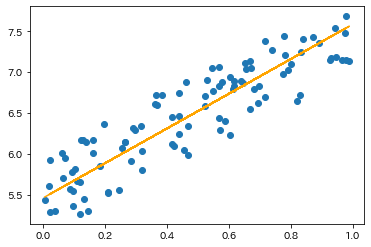

In [5]:
plt.scatter(x,y)
plt.plot(x, predict(x).data, color='orange')
plt.show()

In [2]:
# step43
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable, no_grad
import dezero.functions as F


# dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# initialize weights
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

# network
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

 # train
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    
    if i % 1000 == 0:
        print(loss)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.24759485466749875)
variable(0.23786120447054823)
variable(0.21222231333102942)
variable(0.1674218111783421)
variable(0.09681932619992714)
variable(0.07849528290602338)
variable(0.07749729552991157)
variable(0.07722132399559319)


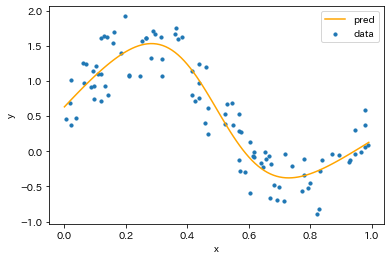

In [34]:
# Plot
plt.scatter(x, y, s=10, label='data')
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, 0.01).reshape(100, 1)
y_pred = predict(t)
plt.plot(t, y_pred.data, color='orange', label='pred')
plt.legend()
plt.show()

In [1]:
# step44

import numpy as np
from dezero import Variable, Parameter

x = Variable(np.array(1.0))
p = Parameter(np.array(1.0))

y = x * p

print(isinstance(p, Parameter))
print(isinstance(x, Parameter))
print(isinstance(y, Parameter))

True
False
False


In [7]:
import numpy as np
from dezero.layers import Layer
from dezero import Variable, Parameter

layer = Layer()

layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = 'test'

print(layer._params)
print('='*20)
for name in layer._params:
    print(name, layer.__dict__[name])

{'p1', 'p2'}
p1 variable(1)
p2 variable(2)


In [6]:
import numpy as np
import dezero.functions as F
import dezero.layers as L
from dezero import Variable, Parameter

# dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10) # 出力サイズを指定
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    l1.cleargrads()
    l2.cleargrads()
    
    loss.backward()
    
    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421636)
variable(0.0763780308623822)
variable(0.07618764131185574)


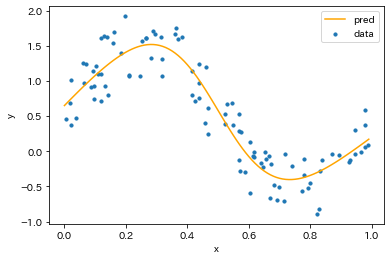

In [7]:
# Plot
plt.scatter(x, y, s=10, label='data')
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, 0.01).reshape(100, 1)
y_pred = predict(t)
plt.plot(t, y_pred.data, color='orange', label='pred')
plt.legend()
plt.show()

In [4]:
#  step45
import numpy as np
import dezero.functions as F
import dezero.layers as L
from dezero import Layer

model = Layer()
model.l1 = L.Linear(5)
model.l2 = L.Linear(3)

def predict(model, x):
    y = model.l1(x)
    y = F.sigmoid(y)
    y = model.l2(y)
    return y

for p in model.params():
    print(p)
    
model.cleargrads()

variable([0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0.])
variable(None)


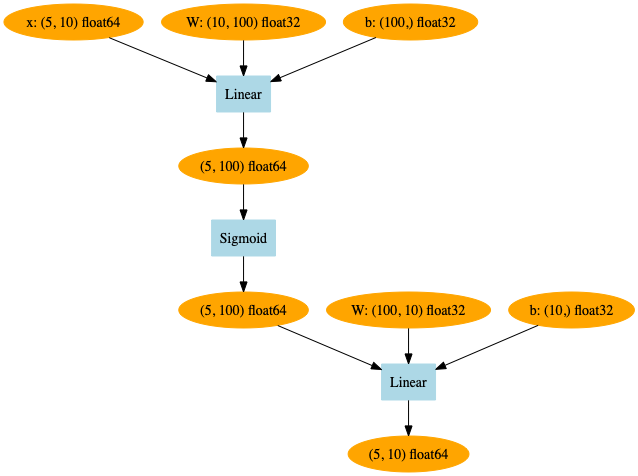

In [3]:
# 45.2
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
    
x = Variable(np.random.randn(5, 10), name='x')
model = TwoLayerNet(100, 10)
model.plot(x)

In [5]:
# 45.3
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

# dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# hayper parameters
lr = 0.2
max_iter = 10000
hidden_size = 10

# Model
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
    
model = TwoLayerNet(hidden_size, 1)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrads()
    loss.backward()
    
    for p in model.params():
        p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421636)
variable(0.0763780308623822)
variable(0.07618764131185574)


In [8]:
from dezero.models import MLP
# model = MLP((10, 1))
model = MLP((10,20,30,20,10 ,1))

In [9]:
for p in model.params():
    print(p)

variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
variable(None)
variable([0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])


In [15]:
class Layer:
    pass

class Dummy(Layer):
    pass

In [20]:
layer = Layer()
dummy = Dummy()
print(isinstance(layer, Layer))
print(isinstance(layer, Dummy))
print(isinstance(dummy, Layer))
print(isinstance(dummy, Dummy))

True
False
True
True


In [1]:
# step46
import numpy as np
from dezero import Variable
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

# dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# hayper parameters
lr = 0.2
max_iter = 10000
hidden_size = 10

# Model
model = MLP((hidden_size, 1))
optimizer = optimizers.MomentumSGD(lr)
optimizer.setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrads()
    loss.backward()
    
    optimizer.update()
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.07743134827996007)
variable(0.07544895146731471)
variable(0.07463260305858642)
variable(0.07420983776361513)
variable(0.07397000396385318)
variable(0.07383179319278564)
variable(0.07375198316276851)
variable(0.07370578149495664)
variable(0.0736788753834185)


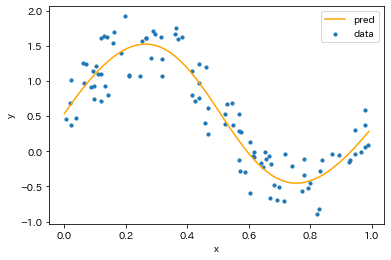

In [4]:
# Plot
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10, label='data')
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, 0.01).reshape(100, 1)
y_pred = model(t)
plt.plot(t, y_pred.data, color='orange', label='pred')
plt.legend()
plt.show()

In [52]:
# step47
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3], [4,5,6]]), name='x')
y = F.get_item(x, 0)
y = y**2
y.backward(create_graph=True)
print(x.grad)

gx = x.grad
gx.name = 'gx'
x.cleargrad()

gx.backward(create_graph=True)
print(x.grad)

variable([[2. 4. 6.]
          [0. 0. 0.]])
variable([[2. 2. 2.]
          [0. 0. 0.]])


In [3]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3], [4,5,6]]))
indices = np.array([0, 0, 1])
y = F.get_item(x, indices)
print(y)

y = x[1]
print(y)

y = x[:, 2]
print(y)

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])
variable([4 5 6])
variable([3 6])


In [4]:
# 47.2
import numpy as np
from dezero import Variable, as_variable
import dezero.functions as F
from dezero.models import MLP

def softmax1d(x):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y / sum_y


x = Variable(np.array([[0.2, -0.4],[0.2, -0.4],[0.2, -0.4],[0.2, -0.4]]))
model = MLP((10, 4))
y = model(x)
p = softmax1d(y)
print(y)
print(p)

variable([[ 0.09935003 -0.10239149  0.37827617 -0.97901549]
          [ 0.09935003 -0.10239149  0.37827617 -0.97901549]
          [ 0.09935003 -0.10239149  0.37827617 -0.97901549]
          [ 0.09935003 -0.10239149  0.37827617 -0.97901549]])
variable([[0.07185628 0.05872858 0.09497315 0.02444199]
          [0.07185628 0.05872858 0.09497315 0.02444199]
          [0.07185628 0.05872858 0.09497315 0.02444199]
          [0.07185628 0.05872858 0.09497315 0.02444199]])


In [5]:
F.softmax(y)

variable([[0.28742513 0.23491433 0.37989259 0.09776796]
          [0.28742513 0.23491433 0.37989259 0.09776796]
          [0.28742513 0.23491433 0.37989259 0.09776796]
          [0.28742513 0.23491433 0.37989259 0.09776796]])

In [1]:
# 47.3
import numpy as np
from dezero import Variable, as_variable
import dezero.functions as F
from dezero.models import MLP

x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2,0,1,0])
model = MLP((10, 3))
y = model(x)
loss = F.softmax_cross_entropy(y, t)

print(loss)

variable(1.382808794908496)


In [3]:
# step48
import dezero

x, t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

(300, 2)
(300,)


In [18]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size) # 小数点切り上げ
avg_loss_list = []

for epoch in range(max_epoch):
    # shuffle dataset
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        # generate mini-batch
        batch_index = index[i*batch_size: (i+1) * batch_size]
        batch_x =x[batch_index]
        batch_t = t[batch_index]
        
        # calculate gradient, update parameters
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_t)
        
    # output learning process per epoch
    avg_loss = sum_loss / data_size
    avg_loss_list.append(avg_loss)
    print(f'epoxh: {epoch + 1}, loss: {round(avg_loss, 4)}')

epoxh: 1, loss: 1.1269
epoxh: 2, loss: 1.0461
epoxh: 3, loss: 0.9506
epoxh: 4, loss: 0.9194
epoxh: 5, loss: 0.8686
epoxh: 6, loss: 0.8927
epoxh: 7, loss: 0.8396
epoxh: 8, loss: 0.7816
epoxh: 9, loss: 0.7966
epoxh: 10, loss: 0.79
epoxh: 11, loss: 0.7814
epoxh: 12, loss: 0.7593
epoxh: 13, loss: 0.7708
epoxh: 14, loss: 0.7633
epoxh: 15, loss: 0.758
epoxh: 16, loss: 0.7707
epoxh: 17, loss: 0.7817
epoxh: 18, loss: 0.7442
epoxh: 19, loss: 0.74
epoxh: 20, loss: 0.7234
epoxh: 21, loss: 0.7334
epoxh: 22, loss: 0.7388
epoxh: 23, loss: 0.767
epoxh: 24, loss: 0.7283
epoxh: 25, loss: 0.7352
epoxh: 26, loss: 0.7414
epoxh: 27, loss: 0.7157
epoxh: 28, loss: 0.7187
epoxh: 29, loss: 0.7213
epoxh: 30, loss: 0.7311
epoxh: 31, loss: 0.708
epoxh: 32, loss: 0.7159
epoxh: 33, loss: 0.7205
epoxh: 34, loss: 0.7079
epoxh: 35, loss: 0.7213
epoxh: 36, loss: 0.7102
epoxh: 37, loss: 0.7137
epoxh: 38, loss: 0.7029
epoxh: 39, loss: 0.7116
epoxh: 40, loss: 0.7036
epoxh: 41, loss: 0.715
epoxh: 42, loss: 0.7005
epoxh: 43

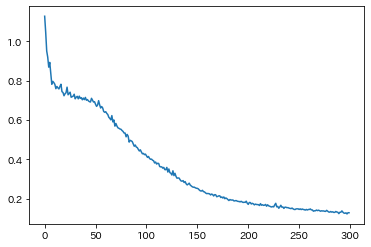

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.arange(max_epoch), avg_loss_list)
plt.show()

In [14]:
# step49
import numpy as np
import dezero
train_set = dezero.datasets.Spiral()

print(len(train_set))
batch_index = [0, 1, 2] # 0から2番目までのデータを取得
batch = [train_set[i] for i in batch_index]

x = np.array([b[0] for b in batch])
y = np.array([b[1] for b in batch])

print(x.shape)
print(y.shape)

300
(3, 2)
(3,)


In [15]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = dezero.datasets.Spiral()
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size) # 小数点切り上げ
avg_loss_list = []

for epoch in range(max_epoch):
    # shuffle dataset
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        # generate mini-batch
        batch_index = index[i*batch_size: (i+1) * batch_size]
        batch = [train_set[i] for i in batch_index]
        batch_x = np.array([b[0] for b in batch])
        batch_t = np.array([b[1] for b in batch])
        
        # calculate gradient, update parameters
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_t)
        
    # output learning process per epoch
    avg_loss = sum_loss / data_size
    avg_loss_list.append(avg_loss)
    print(f'epoxh: {epoch + 1}, loss: {round(avg_loss, 4)}')

epoxh: 1, loss: 1.0757
epoxh: 2, loss: 0.7598
epoxh: 3, loss: 0.7072
epoxh: 4, loss: 0.6856
epoxh: 5, loss: 0.6711
epoxh: 6, loss: 0.6598
epoxh: 7, loss: 0.6502
epoxh: 8, loss: 0.6416
epoxh: 9, loss: 0.6336
epoxh: 10, loss: 0.6262
epoxh: 11, loss: 0.619
epoxh: 12, loss: 0.612
epoxh: 13, loss: 0.6051
epoxh: 14, loss: 0.5982
epoxh: 15, loss: 0.5914
epoxh: 16, loss: 0.5845
epoxh: 17, loss: 0.5775
epoxh: 18, loss: 0.5705
epoxh: 19, loss: 0.5634
epoxh: 20, loss: 0.5561
epoxh: 21, loss: 0.5487
epoxh: 22, loss: 0.5412
epoxh: 23, loss: 0.5335
epoxh: 24, loss: 0.5257
epoxh: 25, loss: 0.5177
epoxh: 26, loss: 0.5096
epoxh: 27, loss: 0.5013
epoxh: 28, loss: 0.4929
epoxh: 29, loss: 0.4844
epoxh: 30, loss: 0.4758
epoxh: 31, loss: 0.4671
epoxh: 32, loss: 0.4583
epoxh: 33, loss: 0.4495
epoxh: 34, loss: 0.4406
epoxh: 35, loss: 0.4316
epoxh: 36, loss: 0.4227
epoxh: 37, loss: 0.4138
epoxh: 38, loss: 0.4049
epoxh: 39, loss: 0.3961
epoxh: 40, loss: 0.3873
epoxh: 41, loss: 0.3786
epoxh: 42, loss: 0.37
epoxh

In [1]:
# step50
50.2
from dezero.datasets import Spiral
from dezero import DataLoader

batch_size = 10
max_epoch = 1

train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader=DataLoader(test_set, batch_size, shuffle=False)

for expoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape) # x, tは訓練データ
        break
        
    for x, t in test_loader:
        print(x.shape, t.shape) # x, tはテストデータ
        break

(10, 2) (10,)


In [9]:
# 50.3
import numpy as np
pred_y = np.array([[0.1, 0.5, 0.7],[0.1, 0.5, 0.7],[0.1, 0.5, 0.7]])
t = np.array([0, 2, 1])
pred = pred_y.argmax(axis=1)

result = (pred == t)

In [1]:
import numpy as np
import dezero.functions as F
y = np.array([[0.2, 0.8, 0], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1, 2, 0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


In [5]:
# 50.4
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP
from dezero import DataLoader
from dezero.datasets import Spiral

np.random.seed(0)

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader=DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.SGD(lr).setup(model)

train_avg_acc_list = []
test_avg_acc_list = []

train_avg_loss_list = []
test_avg_loss_list = []

for epoch in range(max_epoch):
    sum_acc = 0
    sum_loss = 0
    
    for x, t in train_loader:
        
        # calculate gradient, update parameters
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)
        
    # output learning process per epoch
    avg_loss = sum_loss / len(train_set)
    avg_acc = sum_acc / len(train_set)
    
    print(f'epoch: {epoch + 1}')
    print(f'train loss: {round(avg_loss, 4)}, accuracy: {avg_acc}')
    
    train_avg_loss_list.append(avg_loss)
    train_avg_acc_list.append(avg_acc)
    
    sum_acc = 0
    sum_loss = 0
    
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
            
    
    avg_loss = sum_loss / len(test_set)
    avg_acc = sum_acc / len(test_set)
    
    print(f'test loss: {round(avg_loss, 4)}, accuracy: {avg_acc}')
    
    test_avg_loss_list.append(avg_loss)
    test_avg_acc_list.append(avg_acc)

epoch: 1
train loss: 1.3072, accuracy: 0.37
test loss: 1.0895, accuracy: 0.4666666666666667
epoch: 2
train loss: 1.0236, accuracy: 0.55
test loss: 1.0265, accuracy: 0.36666666666666664
epoch: 3
train loss: 0.9277, accuracy: 0.5633333333333334
test loss: 0.9629, accuracy: 0.5333333333333333
epoch: 4
train loss: 0.9704, accuracy: 0.5
test loss: 0.8582, accuracy: 0.6666666666666666
epoch: 5
train loss: 0.8939, accuracy: 0.55
test loss: 0.8159, accuracy: 0.6666666666666666
epoch: 6
train loss: 0.8092, accuracy: 0.56
test loss: 0.8175, accuracy: 0.6666666666666666
epoch: 7
train loss: 0.8119, accuracy: 0.5766666666666667
test loss: 0.793, accuracy: 0.6
epoch: 8
train loss: 0.8236, accuracy: 0.5566666666666666
test loss: 0.8149, accuracy: 0.5
epoch: 9
train loss: 0.7926, accuracy: 0.6033333333333334
test loss: 0.7891, accuracy: 0.6
epoch: 10
train loss: 0.7798, accuracy: 0.5533333333333333
test loss: 0.7841, accuracy: 0.5666666666666667
epoch: 11
train loss: 0.7706, accuracy: 0.5666666666666

test loss: 0.3969, accuracy: 0.8333333333333334
epoch: 102
train loss: 0.3824, accuracy: 0.8233333333333334
test loss: 0.3936, accuracy: 0.9
epoch: 103
train loss: 0.3729, accuracy: 0.85
test loss: 0.3827, accuracy: 0.9
epoch: 104
train loss: 0.3609, accuracy: 0.8633333333333333
test loss: 0.3983, accuracy: 0.8333333333333334
epoch: 105
train loss: 0.3484, accuracy: 0.8733333333333333
test loss: 0.378, accuracy: 0.8
epoch: 106
train loss: 0.3511, accuracy: 0.8766666666666667
test loss: 0.3638, accuracy: 0.9
epoch: 107
train loss: 0.3468, accuracy: 0.8766666666666667
test loss: 0.3638, accuracy: 0.9666666666666667
epoch: 108
train loss: 0.3463, accuracy: 0.87
test loss: 0.377, accuracy: 0.7666666666666667
epoch: 109
train loss: 0.3402, accuracy: 0.8933333333333333
test loss: 0.3536, accuracy: 0.8666666666666667
epoch: 110
train loss: 0.3282, accuracy: 0.88
test loss: 0.3435, accuracy: 0.8666666666666667
epoch: 111
train loss: 0.3312, accuracy: 0.87
test loss: 0.358, accuracy: 1.0
epoch:

epoch: 198
train loss: 0.1672, accuracy: 0.94
test loss: 0.1964, accuracy: 0.9666666666666667
epoch: 199
train loss: 0.1685, accuracy: 0.93
test loss: 0.1936, accuracy: 0.9
epoch: 200
train loss: 0.1658, accuracy: 0.9366666666666666
test loss: 0.1936, accuracy: 0.9666666666666667
epoch: 201
train loss: 0.1625, accuracy: 0.94
test loss: 0.1999, accuracy: 1.0
epoch: 202
train loss: 0.1587, accuracy: 0.95
test loss: 0.2056, accuracy: 0.9333333333333333
epoch: 203
train loss: 0.1641, accuracy: 0.9266666666666666
test loss: 0.1911, accuracy: 1.0
epoch: 204
train loss: 0.1611, accuracy: 0.9433333333333334
test loss: 0.2005, accuracy: 0.9666666666666667
epoch: 205
train loss: 0.168, accuracy: 0.9266666666666666
test loss: 0.191, accuracy: 0.9333333333333333
epoch: 206
train loss: 0.1627, accuracy: 0.9433333333333334
test loss: 0.1969, accuracy: 1.0
epoch: 207
train loss: 0.1657, accuracy: 0.9366666666666666
test loss: 0.1911, accuracy: 0.9666666666666667
epoch: 208
train loss: 0.1619, accurac

test loss: 0.1525, accuracy: 1.0
epoch: 300
train loss: 0.1212, accuracy: 0.95
test loss: 0.1658, accuracy: 0.9333333333333333


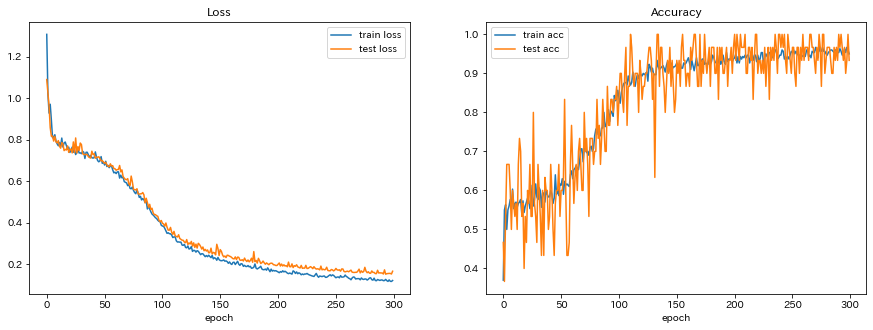

In [24]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 5))

ax = axes[0]
ax.plot(np.arange(max_epoch), train_avg_loss_list, label='train loss')
ax.plot(np.arange(max_epoch), test_avg_loss_list, label='test loss')
ax.set_xlabel('epoch')
ax.set_title('Loss')
ax.legend()

ax = axes[1]
ax.plot(np.arange(max_epoch), train_avg_acc_list, label='train acc')
ax.plot(np.arange(max_epoch), test_avg_acc_list, label='test acc')
ax.set_xlabel('epoch')
ax.set_title('Accuracy')
ax.legend()

plt.show()

In [4]:
 # step51
    
import dezero
train_set = dezero.datasets.MNIST(train=True, transform=None)
test_set = dezero.datasets.MNIST(train=False, transform=None)

print(len(train_set))
print(len(test_set))

Downloading: t10k-images-idx3-ubyte.gz
[##############################] 100.00% Done
Downloading: t10k-labels-idx1-ubyte.gz
[##############################] 100.00% Done
60000
10000


In [5]:
x, t = train_set[0]
print(type(x), x.shape)
print(t)

<class 'numpy.ndarray'> (1, 28, 28)
5


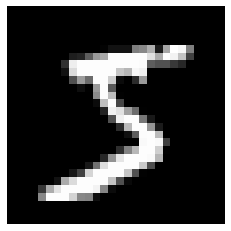

label: 5


In [8]:
import matplotlib.pyplot as plt

# show data
x, t = train_set[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print(f'label: {t}')

In [17]:
import numpy as np

def preprocess(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x

# example
x_ = preprocess(x)
print(x.mean())

print(x_.shape)
print(x_.mean())

35.108418367346935
(784,)
0.13768007


In [1]:
# 51.2

import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP
from dezero import DataLoader

def preprocess(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x

np.random.seed(0)

max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = dezero.datasets.MNIST(train=True, transform=preprocess)
test_set = dezero.datasets.MNIST(train=False, transform=preprocess)

train_loader = DataLoader(train_set, batch_size)
test_loader=DataLoader(test_set, batch_size, shuffle=False)

# model = MLP((hidden_size, 10))
model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = optimizers.SGD().setup(model)

train_avg_acc_list = []
test_avg_acc_list = []

train_avg_loss_list = []
test_avg_loss_list = []

for epoch in range(max_epoch):
    sum_acc = 0
    sum_loss = 0
    
    for x, t in train_loader:
        
        # calculate gradient, update parameters
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)
        
    # output learning process per epoch
    avg_loss = sum_loss / len(train_set)
    avg_acc = sum_acc / len(train_set)
    
    print(f'epoch: {epoch + 1}')
    print(f'train loss: {round(avg_loss, 4)}, accuracy: {avg_acc}')
    
    train_avg_loss_list.append(avg_loss)
    train_avg_acc_list.append(avg_acc)
    
    sum_acc = 0
    sum_loss = 0
    
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
            
    
    avg_loss = sum_loss / len(test_set)
    avg_acc = sum_acc / len(test_set)
    
    print(f'test loss: {round(avg_loss, 4)}, accuracy: {avg_acc}')
    
    test_avg_loss_list.append(avg_loss)
    test_avg_acc_list.append(avg_acc)

epoch: 1
train loss: 1.053, accuracy: 0.7783333333333333
test loss: 0.479, accuracy: 0.89
epoch: 2
train loss: 0.4192, accuracy: 0.8881333333333333
test loss: 0.3452, accuracy: 0.9
epoch: 3
train loss: 0.3397, accuracy: 0.9048166666666667
test loss: 0.2994, accuracy: 0.93
epoch: 4
train loss: 0.3023, accuracy: 0.91405
test loss: 0.2789, accuracy: 0.92
epoch: 5
train loss: 0.2774, accuracy: 0.9211
test loss: 0.2531, accuracy: 0.97
